# Import Libraries, Functions, and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/ENGG_680_Project/Database/

/content/drive/MyDrive/ENGG_680_Project/Database


In [3]:
!ls

 catboost_info			  'predictions_with_index Rect.csv'
 Circular_Linear.png		   Rectangular_Linear.png
 _OLD				  'SS CFST Database_Finalised_for correlation.xlsx'
'predictions_with_index Cir.csv'


In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [5]:
#importing libraries and linear regression from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

#Loading database
df = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx")
df_circ = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx", sheet_name=2)

# Rectangular CatBoost

In [6]:
# Define X (features) and y (target)
X = df.drop(columns=['N_Test'])
y = df['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 10)
(211,)


In [7]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Standardize features
    ('catboost', CatBoostRegressor(verbose=0, random_seed=42))  # CatBoost model
])

In [9]:
# Define hyperparameter grid
param_grid = {
    'catboost__depth': [4, 6, 8],             # Depth of trees
    'catboost__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'catboost__iterations': [100, 200, 300], # Number of boosting iterations
    'catboost__l2_leaf_reg': [1, 3, 5]       # L2 regularization
}

In [10]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [11]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostRegressor object at 0x7b7db1fc1c30>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [4, 6, 8],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__l2_leaf_reg': [1, 3, 5],
                         'catboost__learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [12]:
# Retrieve the best model
best_catboost_model = grid_search.best_estimator_

# Print the best parameters and R^2 score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'catboost__depth': 4, 'catboost__iterations': 300, 'catboost__l2_leaf_reg': 1, 'catboost__learning_rate': 0.05}


In [13]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Predictions on training and test sets
y_train_pred = best_catboost_model.predict(X_train)
y_test_pred = best_catboost_model.predict(X_test)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display metrics
print("\nTraining Set Metrics:")
print(f"  R^2: {train_r2:.3f}")
print(f"  MSE: {train_mse:.3f}")
print(f"  MAPE: {train_mape:.3f}%")

print("\nTest Set Metrics:")
print(f"  R^2: {test_r2:.3f}")
print(f"  MSE: {test_mse:.3f}")
print(f"  MAPE: {test_mape:.3f}%")


Training Set Metrics:
  R^2: 0.996
  MSE: 4673.564
  MAPE: 4.287%

Test Set Metrics:
  R^2: 0.950
  MSE: 65459.073
  MAPE: 9.783%


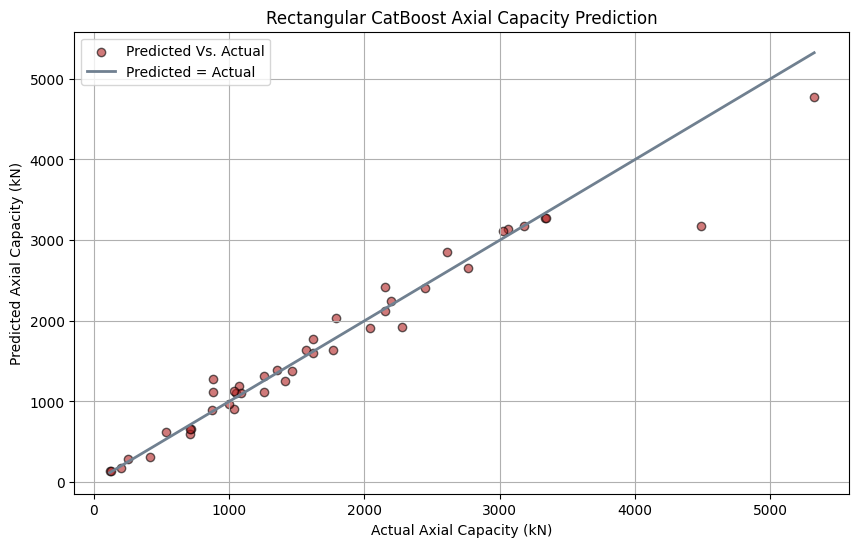

In [14]:
# Scatter Plot: Predicted vs. Actual Values
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='firebrick', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'slategray', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Rectangular CatBoost Axial Capacity Prediction')
plt.legend(['Predicted Vs. Actual', 'Predicted = Actual'])
plt.savefig('Rectangular_CatBoost.png')
plt.grid(True)
plt.show()

# Circular Catboost

In [15]:
# Define X (features) and y (target)
X = df_circ.drop(columns=['N_Test'])
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 9)
(211,)


In [16]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Standardize features
    ('catboost', CatBoostRegressor(verbose=0, random_seed=42))  # CatBoost model
])

In [18]:
# Define hyperparameter grid
param_grid = {
    'catboost__depth': [4, 6, 8],             # Depth of trees
    'catboost__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'catboost__iterations': [100, 200, 300], # Number of boosting iterations
    'catboost__l2_leaf_reg': [1, 3, 5]       # L2 regularization
}

In [19]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [20]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostRegressor object at 0x7b7d588c63e0>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [4, 6, 8],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__l2_leaf_reg': [1, 3, 5],
                         'catboost__learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [21]:
# Retrieve the best model
best_catboost_model = grid_search.best_estimator_

# Print the best parameters and R^2 score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'catboost__depth': 4, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 1, 'catboost__learning_rate': 0.05}


In [22]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Predictions on training and test sets
y_train_pred = best_catboost_model.predict(X_train)
y_test_pred = best_catboost_model.predict(X_test)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display metrics
print("\nTraining Set Metrics:")
print(f"  R^2: {train_r2:.3f}")
print(f"  MSE: {train_mse:.3f}")
print(f"  MAPE: {train_mape:.3f}%")

print("\nTest Set Metrics:")
print(f"  R^2: {test_r2:.3f}")
print(f"  MSE: {test_mse:.3f}")
print(f"  MAPE: {test_mape:.3f}%")


Training Set Metrics:
  R^2: 0.998
  MSE: 13684.788
  MAPE: 8.970%

Test Set Metrics:
  R^2: 0.990
  MSE: 27021.435
  MAPE: 11.682%


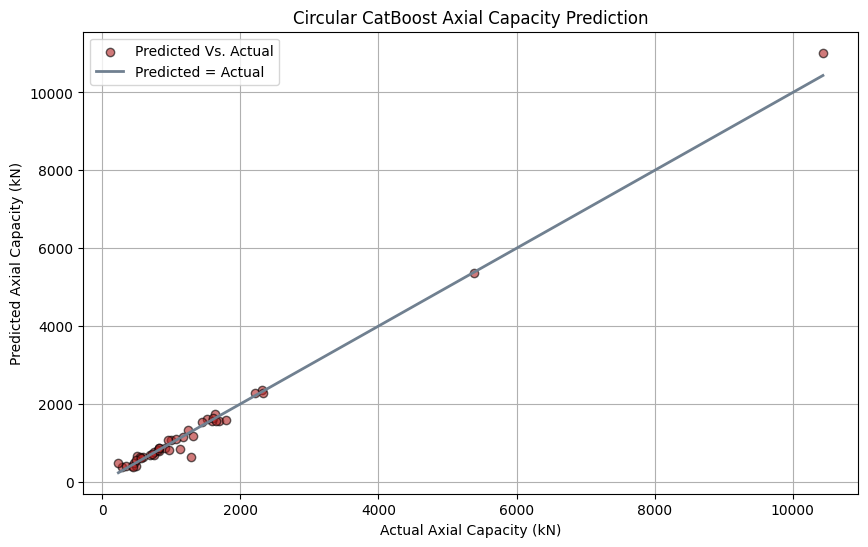

In [23]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='firebrick', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'slategray', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Circular CatBoost Axial Capacity Prediction')
plt.legend(['Predicted Vs. Actual', 'Predicted = Actual'])
plt.savefig('Circular_CatBoost.png')
plt.grid(True)
plt.show()